In [88]:
#Define Constante
DIR = "/content/drive/MyDrive/Colab Notebooks/UPM/PRDL/EDA/"

#importation
import numpy as np
from pandas.plotting import scatter_matrix
from google.colab import drive
import os
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn import linear_model, neighbors, svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import math

In [11]:
def importData():
  drive.mount("/content/drive")
  
  #Change directory
  os.chdir(DIR)

  # Read Clinical Data
  OSA_Clinical_df = pd.read_csv("OSA_DB_UPM_Clinical.csv",sep=';',na_values=['-1'])
  OSA_Clinical_df=OSA_Clinical_df.dropna()

  # Now Read Demographical Information
  OSA_Demo_df = pd.read_csv("OSA_DB_UPM_Age_Gender.csv",na_values=['-1'])
  OSA_Demo_df=OSA_Demo_df.dropna()

  # JOIN OSA_Demo_df and OSA_Clinical_df
  OSA_df = pd.merge(OSA_Clinical_df, OSA_Demo_df, on='ID', how='inner')

  OSA_df['ID'] = OSA_df['ID'].astype('str')
  OSA_df = OSA_df.set_index('ID')

  #Only treat male gender
  df_OSA_male = OSA_df.loc[OSA_df['Gender'] == 0]

  conditions = [
      (df_OSA_male['IAH'] <= 10),
      (df_OSA_male['IAH'] > 10) & (df_OSA_male['IAH'] < 30),
      (df_OSA_male['IAH'] >= 30)
      ]

  # create a list of the values we want to assign for each condition
  values = ['Healthy', 'Mild', 'Severe']

  # create a new column and use np.select to assign values to it using our lists as arguments
  # NOTE: we use select() from numpy
  df_OSA_male['OSA'] = np.select(conditions, values)

  #Remove Mild class
  df_OSA_male_extreme = df_OSA_male.loc[df_OSA_male['OSA'] != 'Mild']

  #Creating BMI column
  df_OSA_male_extreme['BMI'] =  df_OSA_male_extreme['Weight'] / (df_OSA_male_extreme['Height']/100.0)**2
  return df_OSA_male_extreme

In [3]:
def splitData(dataSet):
  # Splitting into train and test sets

  # Generate the training set.  Set random_state to be able to replicate results.
  train = dataSet.sample(frac=0.8, random_state=1)

  # Select anything not in the training set and put it in the testing set.
  test = dataSet.loc[~dataSet.index.isin(train.index)]

  # Print the shapes of both sets.
  #print(train.shape)
  #print(test.shape)
  
  return train, test

In [4]:
def model_training(model, features, output):
  # Fit the model to the training data.
  Trained_model=model.fit(features, output)
  return Trained_model

In [72]:
def model_testing(model, features, output):
  ### Predicting Error

  # Generate our predictions for the test set.
  predictions = model.predict(features)

  # Compute accuracy between our test predictions and the actual values.
  acc=accuracy_score(predictions, output)       
  print('Accuracy: ', acc)

  # Plot confusion matrix
  print(confusion_matrix(predictions, output))
  #plt.show()

In [6]:
def training_process(model, predictors, target, data):
  print("Model : ", type(model))
  print('Predictor : ', predictors)
  print("Target : ", target)
  #Split Date into Training and testing dataset, Train and Test the model on those
  train, test = splitData(data)
  model = model_training(model, train[predictors], train[target])
  model_testing(model, test[predictors], test[target])

##Now We are going to explore the data (EDA)

In [42]:
df = importData()
df.groupby('OSA').describe()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


IAH                        ...        BMI                      
         count       mean        std  ...        50%        75%        max
OSA                                   ...                                 
Healthy  132.0   5.046970   3.065305  ...  26.868063  30.096999  43.428571
Severe   128.0  45.053594  14.186095  ...  30.985601  35.093804  52.298554

[2 rows x 56 columns]

OSA
Healthy    AxesSubplot(0.125,0.125;0.775x0.755)
Severe     AxesSubplot(0.125,0.125;0.775x0.755)
Name: BMI, dtype: object

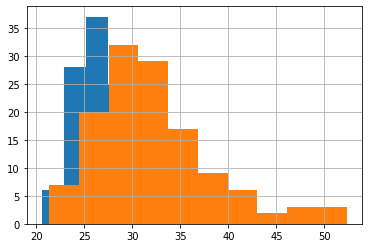

In [25]:
df.groupby('OSA')['BMI'].hist()

In [38]:
from scipy import stats
for column in ['Age', 'BMI', 'Cervical']:
  group1 = df.where(df.OSA== 'Healthy').dropna()[column]
  group2 = df.where(df.OSA== 'Severe').dropna()[column]
  print(column,'p-value:', stats.ttest_ind(group1,group2)[1])


Age p-value: 4.7561243590568463e-07
BMI p-value: 6.320437870715736e-11
Cervical p-value: 3.5060457312045025e-11


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

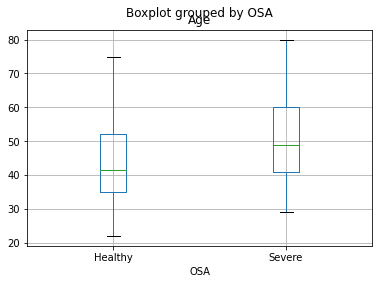

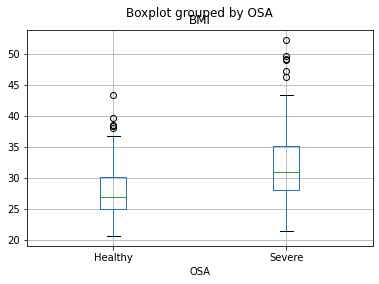

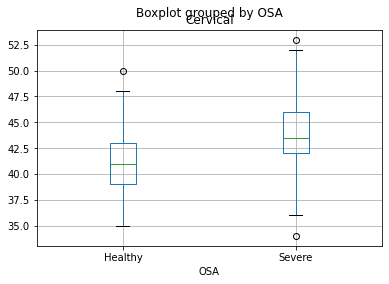

In [40]:
for column in ['Age', 'BMI', 'Cervical']:
  df.boxplot(column=column, by='OSA')

In [85]:
#Define features and output
predictors = ['BMI', 'Age', 'Cervical']
target = 'OSA'

# Define the model
model = linear_model.LogisticRegression()
training_process(model, predictors, target, df)

Model :  <class 'sklearn.linear_model._logistic.LogisticRegression'>
Predictor :  ['BMI', 'Age', 'Cervical']
Target :  OSA
Accuracy:  0.6346153846153846
[[19 12]
 [ 7 14]]


In [115]:
#Define features and output
predictors = ['BMI', 'Age', 'Cervical']
target = 'OSA'

# Define the model
model = svm.SVC()
training_process(model, predictors, target, df)

Model :  <class 'sklearn.svm._classes.SVC'>
Predictor :  ['BMI', 'Age', 'Cervical']
Target :  OSA
Accuracy:  0.6923076923076923
[[19  9]
 [ 7 17]]


In [118]:
#Define features and output
predictors = ['BMI', 'Age', 'Cervical']
target = 'OSA'

# Define the model
model = DecisionTreeClassifier(max_depth=15)
training_process(model, predictors, target, df)

Model :  <class 'sklearn.tree._classes.DecisionTreeClassifier'>
Predictor :  ['BMI', 'Age', 'Cervical']
Target :  OSA
Accuracy:  0.6923076923076923
[[21 11]
 [ 5 15]]


In [106]:
#Define features and output
predictors = ['BMI', 'Age', 'Cervical']
target = 'OSA'

# Define the model
model = RandomForestClassifier(max_depth=10)
training_process(model, predictors, target, df)

Model :  <class 'sklearn.ensemble._forest.RandomForestClassifier'>
Predictor :  ['BMI', 'Age', 'Cervical']
Target :  OSA
Accuracy:  0.7115384615384616
[[18  7]
 [ 8 19]]


In [86]:
#Define features and output
predictors = ['BMI', 'Age', 'Cervical']
target = 'OSA'

# Define the model
model = neighbors.KNeighborsClassifier(n_neighbors = 10, weights='uniform')
training_process(model, predictors, target, df)

Model :  <class 'sklearn.neighbors._classification.KNeighborsClassifier'>
Predictor :  ['BMI', 'Age', 'Cervical']
Target :  OSA
Accuracy:  0.7307692307692307
[[21  9]
 [ 5 17]]
